In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten, Dense 
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
vgg = VGG16(input_shape=(100, 100, 3), include_top=False, weights='imagenet')
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [3]:
loss = ['binary_crossentropy', 'mse']
MODEL = {}
for l in loss:
  x = Flatten()(vgg.output)
  x = Dense(4, activation='sigmoid')(x)
  model = Model(vgg.input, x)
  model.summary()
  if l == 'binary_crossentropy':
    model.compile(optimizer=Adam(learning_rate=0.001), loss=l)
    MODEL[l] = model
  if l == 'mse':
    model.compile(optimizer=SGD(learning_rate=0.01), loss=l)
    MODEL[l] = model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [4]:
def generate_data(batch_size):
  X = np.zeros((batch_size, 100, 100, 3))
  y = np.zeros((batch_size, 4))

  for i in range(batch_size):
    row0 = np.random.randint(0, 95)
    col0 = np.random.randint(0, 95)
    row1 = np.random.randint(row0, 100)
    col1 = np.random.randint(col0, 100)
    X[i, row0:row1, col0:col1] = 1
    y[i, 0] = row0/100
    y[i, 1] = col0/100
    y[i, 2] = (row1 - row0)/100
    y[i, 3] = (col1 - col0)/100
  return X, y

9
[0.63 0.26 0.19 0.49]


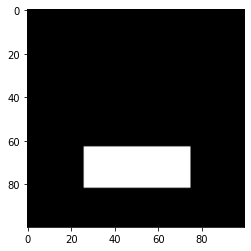

In [5]:
# Test
num = 10
X, y = generate_data(num)
i = np.random.randint(0, num)
print(i)
print(y[i])
_ = plt.imshow(X[i])

In [6]:
num_batch = 80
def Generator(batch_size=64):
  while True:
    for _ in range(num_batch):
      X, y = generate_data(batch_size=batch_size)
      yield X, y

In [7]:
from matplotlib.patches import Rectangle
def prediction(model, l):
  # Generate random image
  X = np.zeros((100, 100, 3))
  row0 = np.random.randint(0, 95)
  col0 = np.random.randint(0, 95)
  row1 = np.random.randint(row0, 100)
  col1 = np.random.randint(col0, 100)

  X[row0:row1, col0:col1] = 1
  x = np.expand_dims(X, 0)
  p = model.predict(x)
  # Draw the box
  fig, ax = plt.subplots(1)
  ax.imshow(X)
  rect = Rectangle(
      (p[0][1]*100, p[0][0]*100),
      p[0][3]*100, p[0][2]*100,linewidth=1.5,edgecolor='g',facecolor='none')
  ax.add_patch(rect)
  plt.title(l)
  plt.show()
  return p

In [8]:
for l in loss:
  MODEL[l].fit(Generator(), steps_per_epoch=80, epochs=8, batch_size=64)
  print('Finish model with ' + l)

Epoch 1/8
80/80 [==============================] - 37s 360ms/step - loss: 0.8667
Epoch 2/8
80/80 [==============================] - 29s 362ms/step - loss: 0.5141
Epoch 3/8
80/80 [==============================] - 29s 363ms/step - loss: 0.4967
Epoch 4/8
80/80 [==============================] - 29s 363ms/step - loss: 0.4962
Epoch 5/8
80/80 [==============================] - 29s 364ms/step - loss: 0.4953
Epoch 6/8
80/80 [==============================] - 29s 364ms/step - loss: 0.4938
Epoch 7/8
80/80 [==============================] - 29s 364ms/step - loss: 0.4927
Epoch 8/8
80/80 [==============================] - 29s 364ms/step - loss: 0.4916
Finish model with binary_crossentropy
Epoch 1/8
80/80 [==============================] - 30s 361ms/step - loss: 0.0333
Epoch 2/8
80/80 [==============================] - 29s 361ms/step - loss: 0.0088
Epoch 3/8
80/80 [==============================] - 29s 361ms/step - loss: 0.0069
Epoch 4/8
80/80 [==============================] - 29s 361ms/step - los

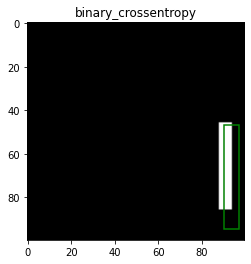

In [18]:
p = prediction(MODEL[loss[0]], loss[0])

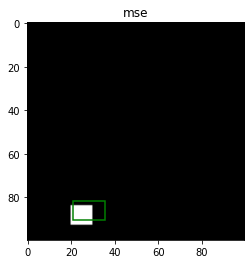

In [25]:
p = prediction(MODEL[loss[1]], loss[1])